## ***Analysis Of My Apple Watch Data***


In [2]:
import pandas as pd
import xmltodict

- ### Step 1. Data Collection

In [3]:
input_path = 'apple_health_export\\export.xml'
with open(input_path,'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())

In [4]:
records_list = input_data['HealthData']['Record']
df_healthData = pd.DataFrame(records_list)
df_healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228585 entries, 0 to 228584
Data columns (total 11 columns):
@type                               228585 non-null object
@sourceName                         228585 non-null object
@sourceVersion                      228581 non-null object
@unit                               226988 non-null object
@creationDate                       228585 non-null object
@startDate                          228585 non-null object
@endDate                            228585 non-null object
@value                              228578 non-null object
@device                             228238 non-null object
MetadataEntry                       18282 non-null object
HeartRateVariabilityMetadataList    341 non-null object
dtypes: object(11)
memory usage: 19.2+ MB


**Removing the @ from columns**

In [5]:
df_healthData.columns = df_healthData.columns.str.replace('@','')
df_healthData.columns

Index(['type', 'sourceName', 'sourceVersion', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'device', 'MetadataEntry',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [6]:
df_healthData.describe()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
count,228585,228585,228581,226988,228585,228585,228585,228578,228238,18282,341
unique,17,4,22,9,69480,174803,174668,38166,85863,6,341
top,HKQuantityTypeIdentifierActiveEnergyBurned,Devâ€™s AppleÂ Watch,5.3.1,kcal,2019-11-19 18:15:29 +0530,2019-08-08 22:32:00 +0530,2019-07-22 13:29:05 +0530,1,"<<HKDevice: 0x2839e6c60>, name:Apple Watch, ma...",{'@key': 'HKMetadataKeyHeartRateMotionContext'...,{'InstantaneousBeatsPerMinute': [{'@bpm': '73'...
freq,85145,151998,84411,105682,289,5,6,9109,15,12207,1


- ### Step 2. Data Cleaning 

Data Cleaning is very important part because its *Garbage In Garbage Out* sceniro. Currently the data is disturbed and messed. We will now clean the data and make it more sensible for analysis purpose.

In [7]:
df_healthData

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
0,HKQuantityTypeIdentifierHeight,Health,10.0.2,cm,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,168,NaN,NaN,NaN
1,HKQuantityTypeIdentifierBodyMass,Health,10.0.2,kg,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,56,NaN,NaN,NaN
2,HKQuantityTypeIdentifierBodyMass,iPhone,12.3.1,kg,2019-06-21 07:38:54 +0530,2019-06-21 07:38:53 +0530,2019-06-21 07:38:53 +0530,62,NaN,NaN,NaN
3,HKQuantityTypeIdentifierHeartRate,Devâ€™s AppleÂ Watch,5.1.1,count/min,2019-06-21 07:45:34 +0530,2019-06-21 07:44:06 +0530,2019-06-21 07:44:06 +0530,65,"<<HKDevice: 0x28395caa0>, name:Apple Watch, ma...",{'@key': 'HKMetadataKeyHeartRateMotionContext'...,NaN
4,HKQuantityTypeIdentifierHeartRate,Devâ€™s AppleÂ Watch,5.1.1,count/min,2019-06-21 07:47:08 +0530,2019-06-21 07:46:05 +0530,2019-06-21 07:46:05 +0530,62.439,"<<HKDevice: 0x28395ce60>, name:Apple Watch, ma...",{'@key': 'HKMetadataKeyHeartRateMotionContext'...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
228580,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Devâ€™s AppleÂ Watch,5.3.1,ms,2020-02-17 14:04:52 +0530,2020-02-17 14:03:47 +0530,2020-02-17 14:04:52 +0530,47.8259,"<<HKDevice: 0x283953d90>, name:Apple Watch, ma...",NaN,{'InstantaneousBeatsPerMinute': [{'@bpm': '80'...
228581,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Devâ€™s AppleÂ Watch,5.3.1,ms,2020-02-17 17:22:42 +0530,2020-02-17 17:21:39 +0530,2020-02-17 17:22:42 +0530,36.2858,"<<HKDevice: 0x283950550>, name:Apple Watch, ma...",NaN,{'InstantaneousBeatsPerMinute': [{'@bpm': '90'...
228582,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Devâ€™s AppleÂ Watch,5.3.1,ms,2020-02-17 20:56:16 +0530,2020-02-17 20:55:11 +0530,2020-02-17 20:56:16 +0530,18.2534,"<<HKDevice: 0x283953020>, name:Apple Watch, ma...",NaN,{'InstantaneousBeatsPerMinute': [{'@bpm': '78'...
228583,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Devâ€™s AppleÂ Watch,5.3.1,ms,2020-02-18 14:19:47 +0530,2020-02-18 14:18:43 +0530,2020-02-18 14:19:47 +0530,59.6529,"<<HKDevice: 0x2839537a0>, name:Apple Watch, ma...",NaN,{'InstantaneousBeatsPerMinute': [{'@bpm': '96'...


In [8]:
# Checking NaN values counts as per columns.
df_healthData.isnull().sum()

type                                     0
sourceName                               0
sourceVersion                            4
unit                                  1597
creationDate                             0
startDate                                0
endDate                                  0
value                                    7
device                                 347
MetadataEntry                       210303
HeartRateVariabilityMetadataList    228244
dtype: int64

**Read** : As we observe, the data is not clean. For example - *type* column has lengthy string values with some prefix, sourceName having special charaters in its values etc.

We will now cleanup the data by taking all the columns one by one. We will fill the null/NA values and make data more uniform and sensible for analysis.

In [9]:
# Getting the unique values
df_healthData.type.unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKCategoryTypeIdentifierSleepAnalysis',
       'HKCategoryTypeIdentifierAppleStandHour',
       'HKCategoryTypeIdentifierMindfulSession',
       'HKCategoryTypeIdentifierHighHeartRateEvent',
       'HKQuantityTypeIdentifierHeartRateVariabilitySDNN'], dtype=object)

In [10]:
df_healthData['type'].replace(to_replace=['HKQuantityTypeIdentifier',
                                                     'HKCategoryTypeIdentifier',
                                                     'HeartRateVariability'],value='',inplace=True,regex=True)
df_healthData.type.unique()

array(['Height', 'BodyMass', 'HeartRate', 'StepCount',
       'DistanceWalkingRunning', 'BasalEnergyBurned',
       'ActiveEnergyBurned', 'FlightsClimbed', 'AppleExerciseTime',
       'RestingHeartRate', 'VO2Max', 'WalkingHeartRateAverage',
       'SleepAnalysis', 'AppleStandHour', 'MindfulSession',
       'HighHeartRateEvent', 'SDNN'], dtype=object)

**Read** : As the first column *type* is now clean as it lengthy string values converted in short and more readable values and not having null/NA values, now we will move on to the second column *sourceName*.

In [11]:
# Observing the unqiure values
df_healthData.sourceName.unique()

array(['Health', 'iPhone', 'Devâ€™s AppleÂ\xa0Watch', 'Clock'],
      dtype=object)

**Read** : As we see we are having the garbage value in this columns, lets replace it with iWatch.


In [12]:
df_healthData.sourceName.replace('Devâ€™s AppleÂ\xa0Watch','iWatch',inplace=True)
df_healthData.sourceName.unique()

array(['Health', 'iPhone', 'iWatch', 'Clock'], dtype=object)

In [13]:
df_healthData.unit.unique()

array(['cm', 'kg', 'count/min', 'count', 'km', 'kcal', 'min',
       'mL/minÂ·kg', nan, 'ms'], dtype=object)

In [14]:
# only 4 records are there with 'mL/minÂ·kg' value so we can drop it.

df_healthData[df_healthData.unit == 'mL/minÂ·kg']

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
226475,VO2Max,iWatch,NaN,mL/minÂ·kg,2019-06-22 02:54:09 +0530,2019-06-22 02:54:09 +0530,2019-06-22 02:54:09 +0530,33.66,NaN,"{'@key': 'HKVO2MaxTestType', '@value': '2'}",NaN
226476,VO2Max,iWatch,NaN,mL/minÂ·kg,2019-07-22 13:31:02 +0530,2019-07-22 13:31:02 +0530,2019-07-22 13:31:02 +0530,31.7498,NaN,"{'@key': 'HKVO2MaxTestType', '@value': '2'}",NaN
226477,VO2Max,iWatch,NaN,mL/minÂ·kg,2019-08-08 22:35:02 +0530,2019-08-08 22:35:02 +0530,2019-08-08 22:35:02 +0530,35.9979,NaN,"{'@key': 'HKVO2MaxTestType', '@value': '2'}",NaN
226478,VO2Max,iWatch,NaN,mL/minÂ·kg,2019-08-09 13:34:40 +0530,2019-08-09 13:34:40 +0530,2019-08-09 13:34:40 +0530,33.8382,NaN,"{'@key': 'HKVO2MaxTestType', '@value': '2'}",NaN


In [15]:
df_healthData.drop(df_healthData[df_healthData.unit == 'mL/minÂ·kg'].index,inplace=True)

In [16]:
# 4 Rows with unit = 'mL/minÂ·kg' are deleted
df_healthData[df_healthData.unit == 'mL/minÂ·kg']

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList


In [17]:
# Checking NaN values
df_healthData[df_healthData.unit.isnull()]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
226647,SleepAnalysis,Clock,50,NaN,2016-11-07 06:31:20 +0530,2016-11-07 01:05:56 +0530,2016-11-07 06:31:20 +0530,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2839e3660>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'Asia/Kolkata'}",NaN
226648,SleepAnalysis,Clock,50,NaN,2017-10-11 08:11:44 +0530,2017-10-11 01:00:00 +0530,2017-10-11 08:11:43 +0530,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2839e37a0>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'Asia/Kolkata'}",NaN
226649,SleepAnalysis,Clock,50,NaN,2019-06-13 08:26:10 +0530,2019-06-13 01:10:18 +0530,2019-06-13 08:26:03 +0530,HKCategoryValueSleepAnalysisInBed,"<<HKDevice: 0x2839e5810>, name:iPhone, manufac...","{'@key': 'HKTimeZone', '@value': 'Asia/Kolkata'}",NaN
226650,AppleStandHour,iWatch,5.1.1,NaN,2019-06-21 08:00:01 +0530,2019-06-21 07:00:00 +0530,2019-06-21 08:00:00 +0530,HKCategoryValueAppleStandHourIdle,"<<HKDevice: 0x2839e58b0>, name:Apple Watch, ma...",NaN,NaN
226651,AppleStandHour,iWatch,5.1.1,NaN,2019-06-21 08:06:14 +0530,2019-06-21 08:00:00 +0530,2019-06-21 09:00:00 +0530,HKCategoryValueAppleStandHourStood,"<<HKDevice: 0x2839e5a90>, name:Apple Watch, ma...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
228239,MindfulSession,iWatch,5.1.1,NaN,2019-08-15 18:02:41 +0530,2019-08-15 18:01:38 +0530,2019-08-15 18:02:38 +0530,NaN,NaN,NaN,NaN
228240,HighHeartRateEvent,iWatch,5.3.1,NaN,2019-09-29 18:43:14 +0530,2019-09-29 18:32:56 +0530,2019-09-29 18:42:56 +0530,NaN,"<<HKDevice: 0x2839b4460>, name:Apple Watch, ma...","{'@key': 'HKHeartRateEventThreshold', '@value'...",NaN
228241,HighHeartRateEvent,iWatch,5.3.1,NaN,2019-11-03 15:36:49 +0530,2019-11-03 15:25:47 +0530,2019-11-03 15:35:47 +0530,NaN,"<<HKDevice: 0x2839b4500>, name:Apple Watch, ma...","{'@key': 'HKHeartRateEventThreshold', '@value'...",NaN
228242,HighHeartRateEvent,iWatch,5.3.1,NaN,2019-11-03 18:44:30 +0530,2019-11-03 18:34:13 +0530,2019-11-03 18:44:13 +0530,NaN,"<<HKDevice: 0x2839b45a0>, name:Apple Watch, ma...","{'@key': 'HKHeartRateEventThreshold', '@value'...",NaN


In [18]:
# Dropping NaN values its not usefull. If we observe the other columns also the values and heartbeat columns are also NaN. so better to remove it.

df_healthData.drop(df_healthData[df_healthData.unit.isnull()].index,inplace=True)

In [19]:
# Checking NaN values and its gone.
df_healthData[df_healthData.unit.isnull()]

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList


In [20]:
df_healthData.isnull().sum()

type                                     0
sourceName                               0
sourceVersion                            0
unit                                     0
creationDate                             0
startDate                                0
endDate                                  0
value                                    0
device                                 340
MetadataEntry                       208713
HeartRateVariabilityMetadataList    226643
dtype: int64

**Read**: Now lets hop onto Date columns - creationDate, startDate, endDate.
The problem with these date columns are that they are having +IST timezone hours (+05:30) at the last.
So now we will convert the format accordin to pandas datetime format.

In [21]:
df_healthData[['creationDate', 'startDate', 'endDate']]

,creationDate,startDate,endDate
0,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530
1,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530,2016-10-23 00:01:20 +0530
2,2019-06-21 07:38:54 +0530,2019-06-21 07:38:53 +0530,2019-06-21 07:38:53 +0530
3,2019-06-21 07:45:34 +0530,2019-06-21 07:44:06 +0530,2019-06-21 07:44:06 +0530
4,2019-06-21 07:47:08 +0530,2019-06-21 07:46:05 +0530,2019-06-21 07:46:05 +0530
...,...,...,...
228580,2020-02-17 14:04:52 +0530,2020-02-17 14:03:47 +0530,2020-02-17 14:04:52 +0530
228581,2020-02-17 17:22:42 +0530,2020-02-17 17:21:39 +0530,2020-02-17 17:22:42 +0530
228582,2020-02-17 20:56:16 +0530,2020-02-17 20:55:11 +0530,2020-02-17 20:56:16 +0530
228583,2020-02-18 14:19:47 +0530,2020-02-18 14:18:43 +0530,2020-02-18 14:19:47 +0530


In [22]:
df_healthData['creationDate'] = df_healthData['creationDate'].str.slice(0, -6, 1)
df_healthData['startDate'] = df_healthData['startDate'].str.slice(0, -6, 1)
df_healthData['endDate'] = df_healthData['endDate'].str.slice(0, -6, 1)

In [23]:
df_healthData[['creationDate', 'startDate', 'endDate']]

,creationDate,startDate,endDate
0,2016-10-23 00:01:20,2016-10-23 00:01:20,2016-10-23 00:01:20
1,2016-10-23 00:01:20,2016-10-23 00:01:20,2016-10-23 00:01:20
2,2019-06-21 07:38:54,2019-06-21 07:38:53,2019-06-21 07:38:53
3,2019-06-21 07:45:34,2019-06-21 07:44:06,2019-06-21 07:44:06
4,2019-06-21 07:47:08,2019-06-21 07:46:05,2019-06-21 07:46:05
...,...,...,...
228580,2020-02-17 14:04:52,2020-02-17 14:03:47,2020-02-17 14:04:52
228581,2020-02-17 17:22:42,2020-02-17 17:21:39,2020-02-17 17:22:42
228582,2020-02-17 20:56:16,2020-02-17 20:55:11,2020-02-17 20:56:16
228583,2020-02-18 14:19:47,2020-02-18 14:18:43,2020-02-18 14:19:47


In [24]:
df_healthData.creationDate

0         2016-10-23 00:01:20
1         2016-10-23 00:01:20
2         2019-06-21 07:38:54
3         2019-06-21 07:45:34
4         2019-06-21 07:47:08
                 ...         
228580    2020-02-17 14:04:52
228581    2020-02-17 17:22:42
228582    2020-02-17 20:56:16
228583    2020-02-18 14:19:47
228584    2020-02-20 15:06:10
Name: creationDate, Length: 226984, dtype: object

In [25]:
df_healthData.device.unique()

array([nan,
       '<<HKDevice: 0x28395caa0>, name:Apple Watch, manufacturer:Apple, model:Watch, hardware:Watch4,1, software:5.1.1>',
       '<<HKDevice: 0x28395ce60>, name:Apple Watch, manufacturer:Apple, model:Watch, hardware:Watch4,1, software:5.1.1>',
       ...,
       '<<HKDevice: 0x28398d860>, name:iPhone, manufacturer:Apple Inc., model:iPhone, hardware:iPhone7,2, software:12.4.1>',
       '<<HKDevice: 0x28398dea0>, name:iPhone, manufacturer:Apple Inc., model:iPhone, hardware:iPhone7,2, software:12.4.1>',
       '<<HKDevice: 0x28398dfe0>, name:iPhone, manufacturer:Apple Inc., model:iPhone, hardware:iPhone7,2, software:12.4.1>'],
      dtype=object)

In [26]:
df_heartRate = df_healthData[df_healthData['type'] == 'HeartRate'][['value','startDate']].sort_values(by='startDate')

In [27]:
df_heartRate.startDate = pd.to_datetime(df_heartRate.startDate)

In [37]:
startDate = '2020-01-02 00:00:00'
endDate = '2020-01-03 00:00:00'

In [39]:
mask = (df_heartRate['startDate'] > startDate) & (df_heartRate['startDate'] < endDate)

In [42]:
df_heartRate.loc[mask].count()

value        43
startDate    43
dtype: int64

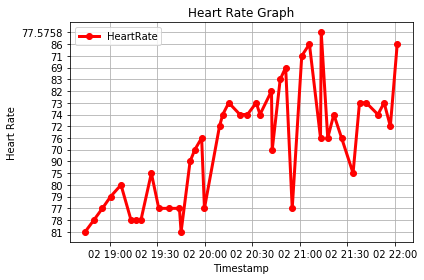

In [40]:
from matplotlib import pyplot as plt
import numpy as np

plt.plot(df_heartRate.startDate.loc[mask], df_heartRate.value.loc[mask], color = 'Red', linestyle = '-', marker = 'o', linewidth='3', label = 'HeartRate')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Graph')
plt.legend()


plt.grid()
plt.tight_layout()
plt.show()